调用智谱ai的 `glm-4v-flash` 模型

In [12]:
from zhipuai import ZhipuAI

client = ZhipuAI(api_key="659b6a52115e4c7ba6a1ffcfe107ce74.JLtjL3ijzR6WT7CR")

def chat(query):
    response = client.chat.completions.create(
        model="glm-4v-flash", messages=[{"role": "user", "content": query}]
    )
    return response.choices[0].message.content

结合智谱ai，按要求修改论文信息

In [13]:
def abbreviate_name(full_name):
    """获取一个名字的简写

    Args:
        full_name (str): 姓名全拼

    Returns:
        str: 简写后的姓名，名在前、姓在后
    """
    parts = full_name.strip().split()
    if len(parts) < 2:
        return full_name

    first_names, last_name = parts[:-1], parts[-1]
    abb_first_names = [name[0].upper() for name in first_names]
    abb_name = ""
    for name in abb_first_names:
        abb_name += name + ". "
    abb_name += last_name.capitalize()
    return abb_name

In [14]:
import json

# prompt = """下面是一个表示论文信息的dist，你需要对它进行一些修改，然后按照原格式返回，要求如下，你要一步步实现：
# 1. 作者姓名格式转换：请将作者姓名简写，名在前，姓在后
# 2. 合并字符串：将简写后的作者姓名合并为一个字符串，作者之间用逗号连接，如果多于三个作者，用“et.al”表示剩余作者
# 3. 关键词提取：TMLR的keywords字段都是空字符串，请根据TMLR论文的摘要，为每篇论文提取总结三个keywords
# 4. 代码链接提取：如果摘要中提到代码链接（如GitHub链接），将其提取出来并存储在新的字段“Code_src”中，如果摘要没有提供链接，“Code_src”字段为空
# 5. 摘要扩展：基于摘要内容，扩展一个简单的“Introduction”，简要介绍论文的背景、研究问题、方法和主要贡献
# 6. 论文主题分析：请根据论文的关键词字段对论文进行聚类分析，按研究主题将论文分为多个组，并为每篇论文分配一个主题标签，生成“Topic”字段，标明该论文属于哪个研究主题（如“生成模型”、“图像识别”、“强化学习”等）

# 将你返回的结果用<start>和<end>标记起来，如：<start>返回结果<end>。
# 待修改的论文信息如下：
# """


def modify_paper_metadata(paper):
    """按要求修改论文信息

    Args:
        paper (dict): 待修改的论文信息（json文件中各个对象）

    Returns:
        dict: 修改后的论文信息
    """
    # 1. 作者姓名格式转换
    authors = paper["authors"]
    new_authors = [abbreviate_name(author) for author in authors[:3]]

    # 2. 合并字符串
    authers_str = ", ".join(new_authors)
    if len(authors) > 3:
        authers_str += ", et.al"
    paper["authors"] = authers_str

    # 3. 关键词提取
    if "TMLR" in paper["venue"]:
        keywords = chat(
            "请根据下面的论文摘要，提取总结三个关键词（英文），按这种格式输出：word1, word2, word3\n"
            + paper["abstract"]
        )
        # print(f"ai keywords: {keywords}")
        paper["keywords"] = keywords.split(", ")

    # 4. 代码链接提取
    have_code_src = chat(
        "检查下面的论文摘要，其中是否提供了代码链接（如GitHub链接）？提供了则回答True，否则回答False：\n"
        + paper["abstract"]
    )
    if have_code_src == "True":
        code_src = chat(
            "根据下面的论文摘要，提取代码链接（如GitHub链接），直接返回链接：\n"
            + paper["abstract"]
        )
    else:
        code_src = ""
    paper["Code_src"] = code_src

    # 5. 摘要扩展
    introduction = chat(
        "根据下面的论文摘要，简单总结介绍一下论文的背景、研究问题、方法和主要贡献（用英文）：\n"
        + paper["abstract"]
    )
    paper["Introduction"] = introduction

    return paper

开始处理原 `json` 中的各论文信息
> 由于论文数量过多，而每次调用智谱api、等待其返回内容存在一定网络延迟，如果处理整个 `paper_metadata_1212_10k.json` 耗时会非常长，故这里只处理前1000条信息，并将修改后的结果保存到 `result.json` 中

In [15]:
input_file = "paper_metadata_1212_10k.json"
output_file = "result.json"

# 读取JSON文件
with open(input_file, "r", encoding="utf-8") as f:
    data = json.load(f)

# 对每个对象(paper)进行修改
modified_data = []
for i, paper in enumerate(data):
    modified_paper = modify_paper_metadata(paper)
    modified_data.append(modified_paper)
    print(f"Processed {i+1}/{len(data)} papers done.")
    if i + 1 >= 1000:
        break

Processed 1/10526 papers done.
Processed 2/10526 papers done.
Processed 3/10526 papers done.
Processed 4/10526 papers done.
Processed 5/10526 papers done.
Processed 6/10526 papers done.
Processed 7/10526 papers done.
Processed 8/10526 papers done.
Processed 9/10526 papers done.
Processed 10/10526 papers done.
Processed 11/10526 papers done.
Processed 12/10526 papers done.
Processed 13/10526 papers done.
Processed 14/10526 papers done.
Processed 15/10526 papers done.
Processed 16/10526 papers done.
Processed 17/10526 papers done.
Processed 18/10526 papers done.
Processed 19/10526 papers done.
Processed 20/10526 papers done.
Processed 21/10526 papers done.
Processed 22/10526 papers done.
Processed 23/10526 papers done.
Processed 24/10526 papers done.
Processed 25/10526 papers done.
Processed 26/10526 papers done.
Processed 27/10526 papers done.
Processed 28/10526 papers done.
Processed 29/10526 papers done.
Processed 30/10526 papers done.
Processed 31/10526 papers done.
Processed 32/1052

根据 `keywords` 对论文进行聚类分析

In [16]:
keywords_list = [paper["keywords"] for paper in modified_data]
keywords_list

[['language modeling', 'memorization', 'dataset contamination'],
 ['architecture adaptation',
  'expressivity bottlenecks',
  'neural network optimization'],
 ['Data-Centric Approach', 'Model Inversion Attacks', 'Privacy Protection'],
 ['PreLowD', 'neural PDE solvers', 'FFNO'],
 ['bootstrap', 'uncertainty quantification', 'survival analysis'],
 ['causal modeling', 'diffusion models', 'counterfactual inference'],
 ['Disentangled Representation Network',
  'Individualized Dose-Response Function',
  'Selection Bias Adjustment'],
 ['synthetic images', 'knowledge distillation', 'feature distillation'],
 ['DL', 'Learning-to-Rank', 'Outlier Detection'],
 ['calibration attack', 'adversarial defense', 'model uncertainty'],
 ['Text-to-SQL', 'Consistency Decoding', 'Instruction Fine-tuning'],
 ['alpha-Stable ReLU-NNs', 'Large-width asymptotics', 'alpha-Stable NTK'],
 ['uncertainty', 'Graph Neural Networks', 'prediction'],
 ['string', 'insertion', 'deletion'],
 ['FL system', 'Covert attack', 'Tran

利用肘部法则和轮廓系数法确定最佳聚类簇数

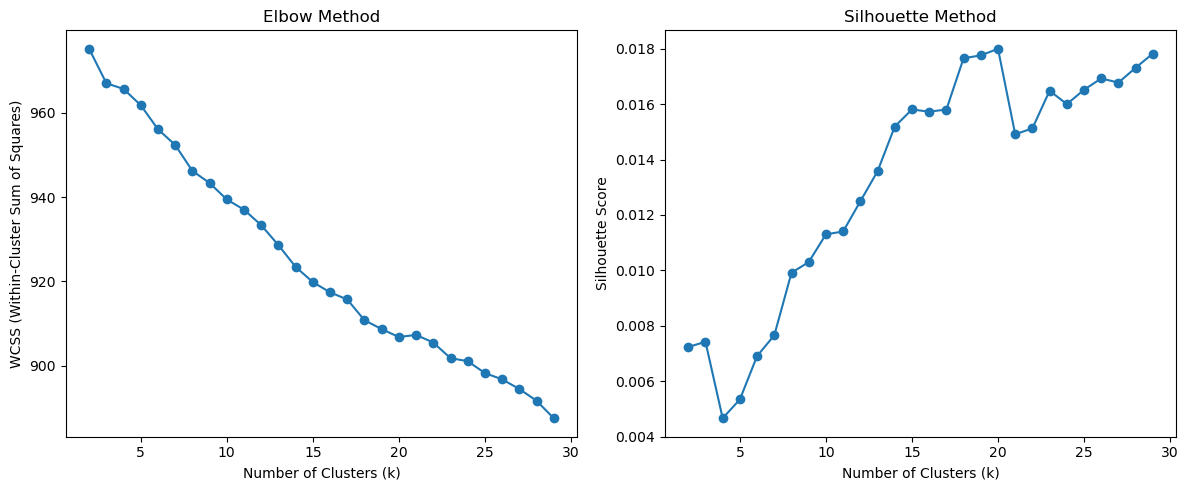

Based on silhouette score, the optimal number of clusters is: 20


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# 使用 TfidfVectorizer 将keywords数据向量化
documents = [" ".join(keywords) for keywords in keywords_list]
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(documents)

# 确定最佳簇数
range_n_clusters = range(2, 30)  # 设置聚类簇数的范围
wcss = []  # 存储肘部法则结果
silhouette_scores = []  # 存储轮廓系数结果

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_

    # 计算 WCSS（肘部法则）
    wcss.append(kmeans.inertia_)

    # 计算轮廓系数
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# 绘制肘部法则和轮廓系数曲线
plt.figure(figsize=(12, 5))

# 肘部法则
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, wcss, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method")

# 轮廓系数
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")

plt.tight_layout()
plt.show()

# 最佳k值
best_k = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(
    f"Based on silhouette score, the optimal number of clusters is: {best_k}"
)

In [40]:
# 使用KMeans进行聚类
num_clusters = best_k  # 根据上一步确定最佳簇数
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# 获取每篇论文的聚类标签
labels = kmeans.labels_

# 输出聚类结果
for i, label in enumerate(labels):
    print(f"论文 {i+1} 的聚类标签: {label}")

# 如果需要将聚类结果按标签分组
clusters = {}
for i, label in enumerate(labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(keywords_list[i])

# 输出每个聚类的论文关键词
for label, cluster in clusters.items():
    print(f"\n聚类 {label} 包含的论文关键词:")
    for keywords in cluster:
        print(keywords)

论文 1 的聚类标签: 14
论文 2 的聚类标签: 0
论文 3 的聚类标签: 0
论文 4 的聚类标签: 0
论文 5 的聚类标签: 8
论文 6 的聚类标签: 18
论文 7 的聚类标签: 0
论文 8 的聚类标签: 0
论文 9 的聚类标签: 5
论文 10 的聚类标签: 4
论文 11 的聚类标签: 0
论文 12 的聚类标签: 16
论文 13 的聚类标签: 1
论文 14 的聚类标签: 0
论文 15 的聚类标签: 4
论文 16 的聚类标签: 13
论文 17 的聚类标签: 18
论文 18 的聚类标签: 0
论文 19 的聚类标签: 8
论文 20 的聚类标签: 19
论文 21 的聚类标签: 4
论文 22 的聚类标签: 0
论文 23 的聚类标签: 19
论文 24 的聚类标签: 10
论文 25 的聚类标签: 18
论文 26 的聚类标签: 18
论文 27 的聚类标签: 4
论文 28 的聚类标签: 1
论文 29 的聚类标签: 0
论文 30 的聚类标签: 0
论文 31 的聚类标签: 7
论文 32 的聚类标签: 18
论文 33 的聚类标签: 5
论文 34 的聚类标签: 9
论文 35 的聚类标签: 0
论文 36 的聚类标签: 16
论文 37 的聚类标签: 0
论文 38 的聚类标签: 5
论文 39 的聚类标签: 0
论文 40 的聚类标签: 0
论文 41 的聚类标签: 3
论文 42 的聚类标签: 18
论文 43 的聚类标签: 0
论文 44 的聚类标签: 5
论文 45 的聚类标签: 5
论文 46 的聚类标签: 5
论文 47 的聚类标签: 16
论文 48 的聚类标签: 12
论文 49 的聚类标签: 5
论文 50 的聚类标签: 0
论文 51 的聚类标签: 18
论文 52 的聚类标签: 3
论文 53 的聚类标签: 13
论文 54 的聚类标签: 12
论文 55 的聚类标签: 0
论文 56 的聚类标签: 6
论文 57 的聚类标签: 6
论文 58 的聚类标签: 12
论文 59 的聚类标签: 18
论文 60 的聚类标签: 17
论文 61 的聚类标签: 9
论文 62 的聚类标签: 19
论文 63 的聚类标签: 10
论文 64 的聚类标签: 0
论文 65 的聚类标签: 8
论文 66 的聚类标签

让智谱AI为每个簇中的 `keywords` 总结出 `Topic`

In [41]:
len(labels)

1000

In [42]:
Topics = {}

# 输出每个聚类的论文关键词
cnt = 1
for label, cluster in clusters.items():
    prompt = "请从下面的词中总结出一个Topic，不要超过3个英语单词："
    prompt += "{"
    for keywords in cluster:
        for keyword in keywords:
            prompt += keyword + ", " 
    prompt += "} "
    prompt += "现在，把你总结的Topic直接告诉我，只要一个："
    Topics[label] = chat(prompt)
    print(f"{cnt}/{best_k} done.")
    cnt += 1

Topics
    

1/20 done.
2/20 done.
3/20 done.
4/20 done.
5/20 done.
6/20 done.
7/20 done.
8/20 done.
9/20 done.
10/20 done.
11/20 done.
12/20 done.
13/20 done.
14/20 done.
15/20 done.
16/20 done.
17/20 done.
18/20 done.
19/20 done.
20/20 done.


{14: 'Large Language Models',
 0: 'Neural Network Optimization',
 8: 'Image Quality Improvement',
 18: 'Generative Models',
 5: 'Anomaly Detection',
 4: 'Adversarial Robustness',
 16: 'approximation',
 1: 'Graph Neural Networks',
 13: 'Federated Learning',
 19: 'Vision Transformer',
 10: 'Multiscale Cascade Model',
 7: '"Machine Learning and Data Analysis Techniques"',
 9: 'Multi-agent Reinforcement Learning',
 3: 'object-centric representation learning',
 12: 'Multi-modal learning',
 6: 'Self-supervised Learning',
 17: 'Stochastic Optimization',
 15: 'Sample Efficiency in Reinforcement Learning',
 11: 'Optimal Transport',
 2: 'Machine Learning'}

In [43]:
for i, label in enumerate(labels):
    modified_data[i]["Topic"] = Topics[label]
    print(f"{i+1}/{len(labels)} done")

1/1000 done
2/1000 done
3/1000 done
4/1000 done
5/1000 done
6/1000 done
7/1000 done
8/1000 done
9/1000 done
10/1000 done
11/1000 done
12/1000 done
13/1000 done
14/1000 done
15/1000 done
16/1000 done
17/1000 done
18/1000 done
19/1000 done
20/1000 done
21/1000 done
22/1000 done
23/1000 done
24/1000 done
25/1000 done
26/1000 done
27/1000 done
28/1000 done
29/1000 done
30/1000 done
31/1000 done
32/1000 done
33/1000 done
34/1000 done
35/1000 done
36/1000 done
37/1000 done
38/1000 done
39/1000 done
40/1000 done
41/1000 done
42/1000 done
43/1000 done
44/1000 done
45/1000 done
46/1000 done
47/1000 done
48/1000 done
49/1000 done
50/1000 done
51/1000 done
52/1000 done
53/1000 done
54/1000 done
55/1000 done
56/1000 done
57/1000 done
58/1000 done
59/1000 done
60/1000 done
61/1000 done
62/1000 done
63/1000 done
64/1000 done
65/1000 done
66/1000 done
67/1000 done
68/1000 done
69/1000 done
70/1000 done
71/1000 done
72/1000 done
73/1000 done
74/1000 done
75/1000 done
76/1000 done
77/1000 done
78/1000 

保存结果

In [44]:
# 将修改后的内容写入新的JSON文件
with open(output_file, "w", encoding="utf-8") as f:
    json.dump(modified_data, f, ensure_ascii=False, indent=4)
